Import liabrary

In [1]:
import pandas as pd
import plotly.express as px

Translation Dictionary

In [2]:
translations = {
    'en': {
        'title': 'Top App Categories by Region',
        'xaxis': 'Region',
        'yaxis': 'Total Installs'
    },
    'hi': {
        'title': 'क्षेत्रवार शीर्ष ऐप श्रेणियाँ',
        'xaxis': 'क्षेत्र',
        'yaxis': 'कुल इंस्टॉल'
    },
     'mr': {
        'title': 'प्रदेशानुसार शीर्ष अॅप श्रेणी',
        'xaxis': 'प्रदेश',
        'yaxis': 'एकूण प्रतिष्ठापन'
    }
}

Choose your language 

In [15]:
language = 'mr'  # Use 'en', 'hi', or 'mr'

Load the data 

In [16]:
df = pd.read_csv(r'C:\Users\vishal\Desktop\Dataset\Play Store Data.csv')

Data Preparation

In [17]:
df['Country'] = 'Global'
df = df.dropna(subset=['App', 'Category', 'Installs', 'Country'])

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df = df.dropna(subset=['Installs'])

In [18]:
top_categories = (
    df.groupby(['Country', 'Category'])['Installs']
    .sum()
    .reset_index()
    .sort_values(by='Installs', ascending=False)
)

In [19]:
top_per_region = (
    top_categories.groupby('Country').head(1)  # Top category per country
)

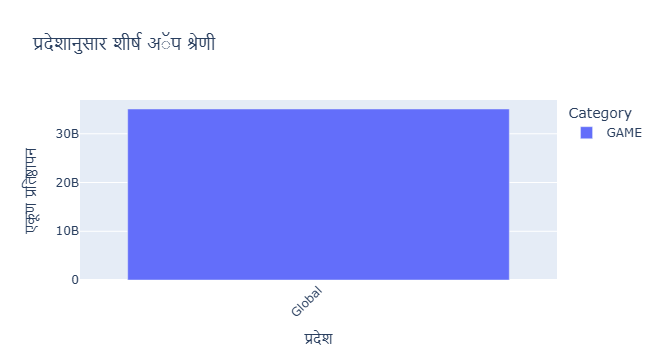

In [20]:
fig = px.bar(
    top_per_region,
    x='Country',
    y='Installs',
    color='Category',
    title=translations[language]['title'],
    labels={
        'Country': translations[language]['xaxis'],
        'Installs': translations[language]['yaxis']
    }
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()